In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [416]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [417]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [418]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [419]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [420]:
print(train.columns[train.isna().any()])
print(test.columns[test.isna().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


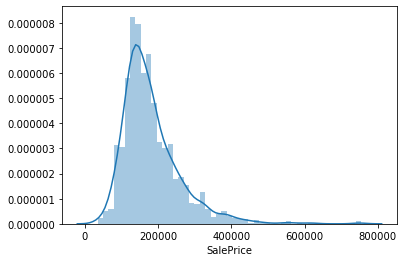

In [421]:
sns.distplot(train['SalePrice'])

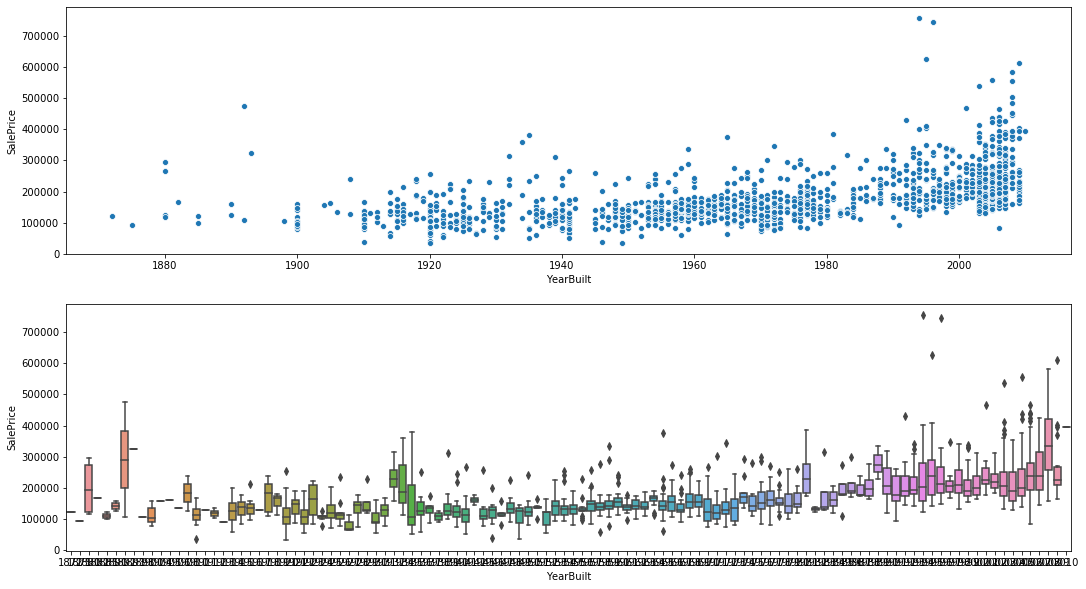

In [422]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(211)
sns.scatterplot(train['YearBuilt'], train['SalePrice'])

ax2 = fig.add_subplot(212)
sns.boxplot(train['YearBuilt'], train['SalePrice'])

In [423]:
train.drop(train[(train['YearBuilt'] < 1900) & (train['SalePrice'] > 200000)].index, inplace=True)
train.drop(train[(train['YearBuilt'] < 2000) & (train['SalePrice'] > 500000)].index, inplace=True)

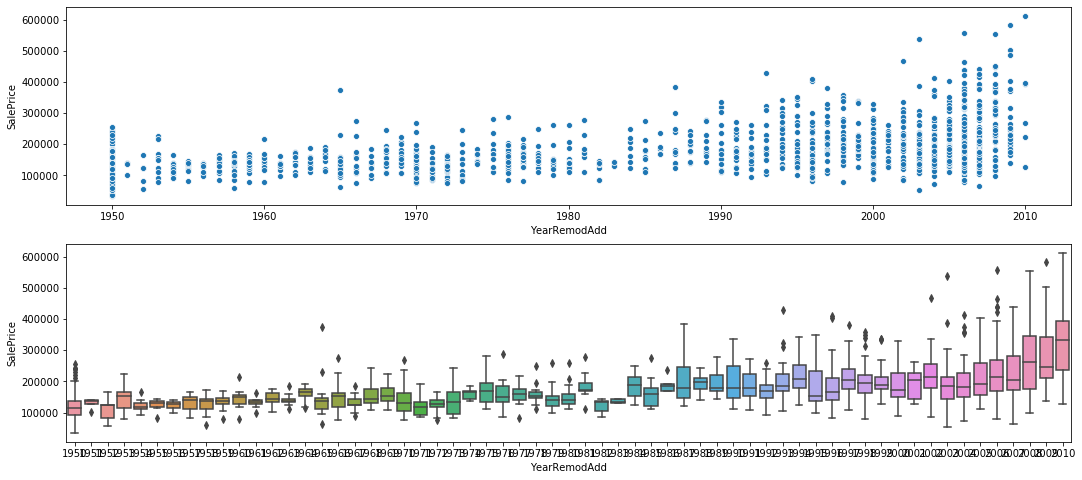

In [424]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
sns.scatterplot(train['YearRemodAdd'], train['SalePrice'])

ax2 = fig.add_subplot(212)
sns.boxplot(train['YearRemodAdd'], train['SalePrice'])

In [425]:
train.drop(train[(train['YearRemodAdd'] < 1970) & (train['SalePrice'] > 300000)].index, inplace=True)

Text(0.5, 0, 'Overall')

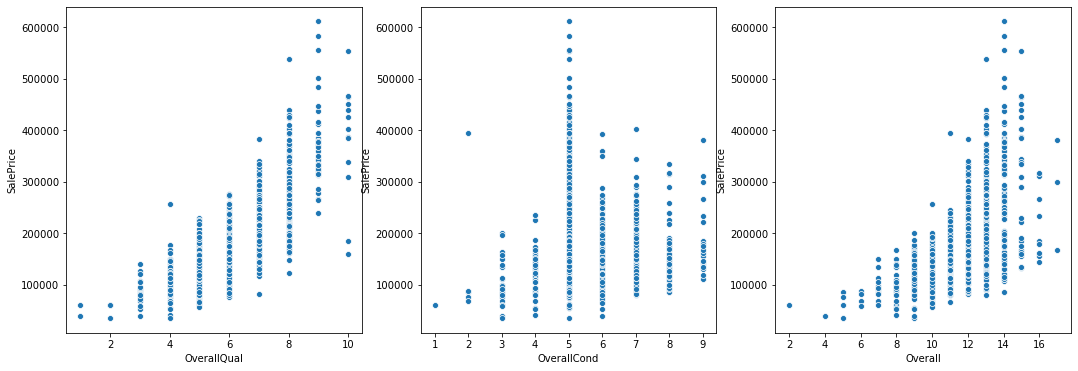

In [426]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131)
sns.scatterplot(train['OverallQual'], train['SalePrice'])

ax2 = fig.add_subplot(132)
sns.scatterplot(train['OverallCond'], train['SalePrice'])

ax3 = fig.add_subplot(133)
sns.scatterplot(train['OverallQual'] + train['OverallCond'], train['SalePrice'])
plt.xlabel('Overall')

In [427]:
train.drop(train[(train['OverallCond'] == 2) & (train['SalePrice'] > 300000)].index, inplace=True)

Text(0.5, 0, 'TotalSF')

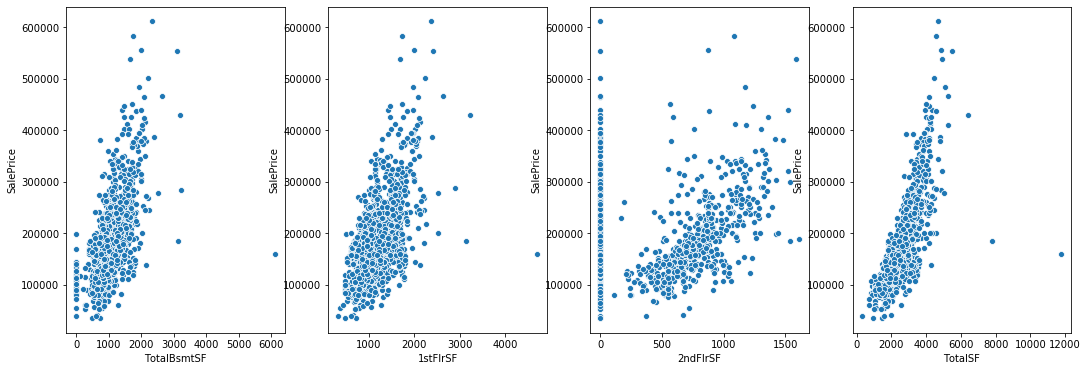

In [428]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(141)
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])

ax2 = fig.add_subplot(142)
sns.scatterplot(train['1stFlrSF'], train['SalePrice'])

ax3 = fig.add_subplot(143)
sns.scatterplot(train['2ndFlrSF'], train['SalePrice'])

ax4 = fig.add_subplot(144)
sns.scatterplot(train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'], train['SalePrice'])
plt.xlabel('TotalSF')

In [429]:
train.drop(train[train['TotalBsmtSF'] > 6000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace=True)

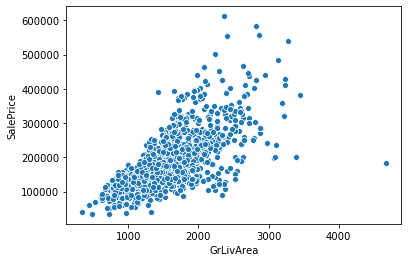

In [430]:
sns.scatterplot(train['GrLivArea'], train['SalePrice'])

In [431]:
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)

In [432]:
data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']), ignore_index=True)
data.shape

(2908, 79)

In [433]:
na_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in na_cols:
    data[col].fillna('NA', inplace=True)

In [434]:
zero_cols = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'GarageYrBlt', 'GarageCars', 'GarageArea']

for col in zero_cols:
    data[col].fillna(0, inplace=True)

In [435]:
most_cols = ['MSZoning','Exterior1st', 'Exterior2nd', 'Electrical',
            'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'SaleType']

for col in most_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [436]:
data.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    64.5
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    88.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     81.5
Veenker    80.0
Name: LotFrontage, dtype: float64

In [437]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['Functional'].fillna('Typ', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)

In [438]:
data['Utilities'].value_counts()
data = data.drop(columns=['Utilities'], axis=1)

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2908 non-null   int64  
 1   MSZoning       2908 non-null   object 
 2   LotFrontage    2908 non-null   float64
 3   LotArea        2908 non-null   int64  
 4   Street         2908 non-null   object 
 5   Alley          2908 non-null   object 
 6   LotShape       2908 non-null   object 
 7   LandContour    2908 non-null   object 
 8   LotConfig      2908 non-null   object 
 9   LandSlope      2908 non-null   object 
 10  Neighborhood   2908 non-null   object 
 11  Condition1     2908 non-null   object 
 12  Condition2     2908 non-null   object 
 13  BldgType       2908 non-null   object 
 14  HouseStyle     2908 non-null   object 
 15  OverallQual    2908 non-null   int64  
 16  OverallCond    2908 non-null   int64  
 17  YearBuilt      2908 non-null   int64  
 18  YearRemo

In [440]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [441]:
qual_list = ['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond','PoolQC',                       'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual','BsmtCond']

qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA': 0}

for col in qual_list:
    data[col] = data[col].map(qual_map)

In [442]:
str_cols = ['MSSubClass', 'YrSold', 'MoSold', 'OverallCond', 'MSZoning', 
        'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
        'Functional', 'Electrical', 'KitchenQual', 'KitchenAbvGr', 'SaleType', 
        'Exterior1st', 'Exterior2nd', 'YearBuilt',
        'YearRemodAdd', 'GarageYrBlt','BedroomAbvGr','LowQualFinSF']

for col in str_cols:
    data[col] = data[col].astype(str)

In [443]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

for col in year_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

lab_cols = ['Heating', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 
            'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive',
            'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 
            'MoSold', 'MSZoning','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','Exterior1st','MasVnrType', 'Foundation', 'GarageType',
            'SaleType','SaleCondition']

for col in lab_cols:
    new_col = "labfit_" + col
    data[new_col] = LabelEncoder().fit_transform(data[col]) 

In [444]:
data.shape

(2908, 107)

In [445]:
data['BsmtExposure'] = data['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
data['Functional'] = data['Functional'].map({'Maj2':1, 'Sev':2, 'Min2':3, 'Min1':4, 'Maj1':5, 'Mod':6, 'Typ':7})
data['GarageFinish'] = data['GarageFinish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
data['Fence'] = data['Fence'].map({'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [446]:
data['NewerDwelling'] = data['MSSubClass'].map({'20': 1, '30': 0, '40': 0, '45': 0, '50': 0, '60': 1, '70': 0, '75': 0, '80': 0, '85': 0, '90': 0, '120': 1, '150': 0, '160': 0, '180': 0, '190': 0})
data['HasMasVnr'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0})
data['PriceDown'] = data['SaleCondition'].map({'Abnorml': 1,'Alloca': 1,'AdjLand': 1,'Family': 1,'Normal': 0, 'Partial': 0})
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Overall'] = data['OverallQual'].astype(int) + data['OverallCond'].astype(int)
data['HasWoodDeck'] = (data['WoodDeckSF'] == 0) * 1
data['HasOpenPorch'] = (data['OpenPorchSF'] == 0) * 1
data['HasEnclosedPorch'] = (data['EnclosedPorch'] == 0) * 1
data['Has3SsnPorch'] = (data['3SsnPorch'] == 0) * 1
data['HasScreenPorch'] = (data['ScreenPorch'] == 0) * 1

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Columns: 117 entries, MSSubClass to HasScreenPorch
dtypes: float64(9), int64(73), object(35)
memory usage: 2.6+ MB


In [448]:
data.isnull().sum().sort_values()

MSSubClass             0
labfit_GarageFinish    0
labfit_BsmtExposure    0
labfit_Fence           0
labfit_Functional      0
                      ..
BsmtFinSF1             0
BsmtFinType1           0
BsmtExposure           0
2ndFlrSF               0
HasScreenPorch         0
Length: 117, dtype: int64

In [449]:
data = pd.get_dummies(data)

In [450]:
data.shape

(2908, 346)

In [451]:
scaler = RobustScaler()
scaler.fit(data)
data = scaler.transform(data)

In [452]:
pca = PCA(n_components=320)
data = pca.fit_transform(data)

In [453]:
n_train = train.shape[0]
X_train = data[:n_train]
X_test = data[n_train:]
y = train['SalePrice']

In [454]:
lasso = Lasso(alpha=0.0004,random_state=1,max_iter=10000)
ridge = Ridge(alpha=35)
svr = SVR(gamma= 0.0004,kernel='rbf',C=14,epsilon=0.009)
ker = KernelRidge(alpha=0.4 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.004,l1_ratio=0.08,random_state=3,max_iter=10000)
bay = BayesianRidge()
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05,        
        max_depth=3,min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, 
        reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, 
                n_estimators=700,max_bin = 55, bagging_fraction = 0.8,
                bagging_freq = 5, feature_fraction = 0.25,feature_fraction_seed=9, 
                bagging_seed=9,min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4,                          max_features='sqrt',min_samples_leaf=15, min_samples_split=10,
                        loss='huber', random_state =5)

In [455]:
xgb.fit(X_train, y)
xgb_predict = xgb.predict(X_test)

In [456]:
submission_xgb = pd.DataFrame()
submission_xgb['Id'] = test.Id
submission_xgb['SalePrice'] = xgb_predict
submission_xgb.to_csv('submission_xgb.csv', index=False)

In [457]:
lgbm.fit(X_train, y)
lgbm_predict = lgbm.predict(X_test)

In [458]:
submission_lgbm = pd.DataFrame()
submission_lgbm['Id'] = test.Id
submission_lgbm['SalePrice'] = lgbm_predict
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

In [463]:
GBR.fit(X_train, y)
GBR_predict = GBR.predict(X_test)

In [464]:
submission_GBR = pd.DataFrame()
submission_GBR['Id'] = test.Id
submission_GBR['SalePrice'] = GBR_predict
submission_GBR.to_csv('submission_GBR.csv', index=False)